In [1]:
#import torch
!pip install tangram-sc==0.4.0
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import scipy.io as io
import scipy.sparse as sparse
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import h5py
import seaborn as sns
import copy
import scipy as sp
import tangram as tg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 KB 138.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 151.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 161.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 57.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

In [3]:
# read in single cell count matrix
X = pd.read_csv("X_matrix.csv", index_col=0)
print(X.shape)
X = X.T
print("After transpose:", X.shape)


(33696, 5306)
After transpose: (5306, 33696)


In [4]:
genes = pd.read_csv("gene_names.csv", header=None)[0].tolist()
cell_types = pd.read_csv("cell_type.csv", header=None)[0].dropna().tolist()
genes = genes[1:]

In [5]:
obs = pd.DataFrame(index=X.index) # cell barcode

In [6]:
meta = pd.read_csv("cell_type.csv")
meta.columns = ["cell_id", "cell_type"]  
meta.set_index("cell_id", inplace=True)

# 4. create single cell AnnData
var = pd.DataFrame(index=genes)
ad_sc = AnnData(X=X.values, obs=meta.loc[X.index], var=var)


In [7]:
print(ad_sc)
print(ad_sc.obs.head())

AnnData object with n_obs × n_vars = 5306 × 33696
    obs: 'cell_type'
                                               cell_type
0h_DEF_AAACCCAGTGACTATC-1         Large Antral Granulosa
0h_DEF_AAACGAACAAGAGGCT-1            Preantral Granulosa
0h_DEF_AAACGCTCACGCTGAC-1         Large Antral Granulosa
0h_DEF_AAACGCTGTCATCCGG-1  Unknown (neuronal/epithelial)
0h_DEF_AAACGCTGTCTTGGTA-1      Steroidogenic Theca early


In [8]:
# gene name
var = pd.DataFrame(index=genes)
var

Empty DataFrame
Columns: []
Index: [Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15, A930006A01Rik, Lypla1, Tcea1, Rgs20, Gm16041, Atp6v1h, Oprk1, Npbwr1, 4732440D04Rik, Rb1cc1, Alkal1, St18, Gm57122, Pcmtd1, Gm26901, Gm30414, Sntg1, Rrs1, Adhfe1, 2610203C22Rik, Vxn, Gm29520, Mybl1, Vcpip1, 1700034P13Rik, Sgk3, Snhg6, Mcmdc2, Tcf24, Ppp1r42, Gm15818, Gm57177, Cops5, Cspp1, Arfgef1, Cpa6, Prex2, A830018L16Rik, Gm17644, Gm29663, Sulf1, Slco5a1, Gm29283, Prdm14, Ncoa2, Gm29570, Tram1, Gm57152, Lactb2, Xkr9, Eya1, Gm9947, Msc, Trpa1, Kcnb2, Terf1, Sbspon, 4930444P10Rik, Rpl7, Rdh10, Gm28095, Stau2, Gm7568, Ube2w, Eloc, D030040B21Rik, Tmem70, Ly96, Gm28376, Jph1, Gm28783, Gdap1, Gm28784, Pi15, Gm28154, Gm16070, Crispld1, Gm28153, Gm28756, Crisp4, Defb18, Defb41, Gm15825, Tfap2d, Tfap2b, Gm28340, Pkhd1, 4930486I03Rik, Lincmd1, Il17a, Il17f, ...]

[33696 rows x 0 columns]

In [9]:
print(ad_sc)
print(ad_sc.obs.head()) # cell name and cell type
print(ad_sc.var.head()) # gene name 


AnnData object with n_obs × n_vars = 5306 × 33696
    obs: 'cell_type'
                                               cell_type
0h_DEF_AAACCCAGTGACTATC-1         Large Antral Granulosa
0h_DEF_AAACGAACAAGAGGCT-1            Preantral Granulosa
0h_DEF_AAACGCTCACGCTGAC-1         Large Antral Granulosa
0h_DEF_AAACGCTGTCATCCGG-1  Unknown (neuronal/epithelial)
0h_DEF_AAACGCTGTCTTGGTA-1      Steroidogenic Theca early
Empty DataFrame
Columns: []
Index: [Xkr4, Gm1992, Gm19938, Gm37381, Rp1]


In [10]:
#read in spatial dataset
ad_sp = sc.read_h5ad('/workspace/region_1/processed_region1.h5ad')
# #ad_sc = sc.read_h5ad('/Users/f006gs0/Downloads/alldata.filt.00hrs.h5ad') # we do not have this

In [ ]:
ad_sp.obs.head()

In [11]:
tg.pp_adatas(ad_sc, ad_sp, genes=None) # find shared gene, log1p, scaling

INFO:root:198 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:198 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [12]:
ad_map = tg.map_cells_to_space(ad_sc, ad_sp)
# this single step took me ~8hrs. and honestly this is the only one that is taking so long. 

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 198 genes and None density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.276
Score: 0.750
Score: 0.772
Score: 0.778
Score: 0.781
Score: 0.782
Score: 0.784
Score: 0.784
Score: 0.785
Score: 0.786


INFO:root:Saving results..


In [13]:
ad_map.obs

cell_type
0h_DEF_AAACCCAGTGACTATC-1         Large Antral Granulosa
0h_DEF_AAACGAACAAGAGGCT-1            Preantral Granulosa
0h_DEF_AAACGCTCACGCTGAC-1         Large Antral Granulosa
0h_DEF_AAACGCTGTCATCCGG-1  Unknown (neuronal/epithelial)
0h_DEF_AAACGCTGTCTTGGTA-1      Steroidogenic Theca early
...                                                  ...
0h_DEF_TTTGTTGCAGGACTTT-1         Large Antral Granulosa
0h_DEF_TTTGTTGCATTACGGT-1      Steroidogenic Theca early
0h_DEF_TTTGTTGTCAACCGAT-1            Preantral Granulosa
0h_DEF_TTTGTTGTCCACACCT-1             Myeloid/Macrophage
0h_DEF_TTTGTTGTCTTGCGCT-1            Preantral Granulosa

[5306 rows x 1 columns]

In [14]:
tg.project_cell_annotations(ad_map, ad_sp, annotation="cell_type")
# task1: add predicted cell type composition to spatial merfish data

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


In [15]:
annotation_list = list(pd.unique(ad_sc.obs['cell_type']))

In [16]:
annotation_list

['Large Antral Granulosa',
 'Preantral Granulosa',
 'Unknown (neuronal/epithelial)',
 'Steroidogenic Theca early',
 'small Luteal',
 'Myeloid/Macrophage',
 'Epithelial (OSE)',
 'Stroma early',
 'Endothelial',
 'Epithelial',
 'Lymphatic Endothelial',
 'Stroma-like (perivascular)',
 'Steroidogenic Theca late',
 'Stroma late']

In [17]:
ad_map

AnnData object with n_obs × n_vars = 5306 × 52980
    obs: 'cell_type'
    var: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'Cell_Type', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [18]:
ad_sp.obsm['tangram_ct_pred']

Large Antral Granulosa  \
142239694008826425870598529961971733060                0.013408   
156496055044123368112581532430428700130                0.000294   
170147117900539217990504369575563685609                0.018817   
245018205818407725393608124847300514411                0.027762   
248766121147733953446397701086224357294                0.033927   
...                                                         ...   
29262040266309565977330069786517739433                 0.066409   
42989839927821851744966915443932768944                 0.047224   
58946784743266084206672030774357118710                 0.021830   
66033117609143321899003727465638023282                 0.025030   
76024018905289447585697993269427778791                 0.037616   

                                         Preantral Granulosa  \
142239694008826425870598529961971733060             0.000157   
156496055044123368112581532430428700130             0.000269   
170147117900539217990504369575563685609             0.017487   
245018205818407725393608124847300514411             0.000127   
248766121147733953446397701086224357294             0.000125   
...                                                      ...   
29262040266309565977330069786517739433              0.000119   
42989839927821851744966915443932768944              0.000759   
58946784743266084206672030774357118710              0.005596   
66033117609143321899003727465638023282              0.030992   
76024018905289447585697993269427778791              0.011815   

                                         Unknown (neuronal/epithelial)  \
142239694008826425870598529961971733060                       0.000032   
156496055044123368112581532430428700130                       0.000038   
170147117900539217990504369575563685609                       0.000683   
245018205818407725393608124847300514411                       0.000027   
248766121147733953446397701086224357294                       0.002822   
...                                                                ...   
29262040266309565977330069786517739433                        0.012674   
42989839927821851744966915443932768944                        0.005884   
58946784743266084206672030774357118710                        0.000026   
66033117609143321899003727465638023282                        0.000039   
76024018905289447585697993269427778791                        0.008355   

                                         Steroidogenic Theca early  \
142239694008826425870598529961971733060                   0.000068   
156496055044123368112581532430428700130                   0.004403   
170147117900539217990504369575563685609                   0.010193   
245018205818407725393608124847300514411                   0.009397   
248766121147733953446397701086224357294                   0.008691   
...                                                            ...   
29262040266309565977330069786517739433                    0.019622   
42989839927821851744966915443932768944                    0.026177   
58946784743266084206672030774357118710                    0.004863   
66033117609143321899003727465638023282                    0.025687   
76024018905289447585697993269427778791                    0.025585   

                                         small Luteal  Myeloid/Macrophage  \
142239694008826425870598529961971733060      0.009011            0.000128   
156496055044123368112581532430428700130      0.029081            0.000797   
170147117900539217990504369575563685609      0.000087            0.000024   
245018205818407725393608124847300514411      0.021208            0.000560   
248766121147733953446397701086224357294      0.006580            0.000068   
...                                               ...                 ...   
29262040266309565977330069786517739433       0.000068            0.002415   
42989839927821851744966915443932768944       0.010700            0.000047   
58946784743266084206672030774357118710      

In [19]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc) # add gene expression to spatial 
ad_ge

AnnData object with n_obs × n_vars = 52980 × 25892
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'Cell_Type', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'training_genes', 'overlap_genes'

In [20]:
ad_ge.obsm['spatial'] = ad_sp.obsm['spatial']


In [21]:
tg.plot_gene(
    adata_sp=ad_sp,  # 可以用原始空间数据或预测结果
    adata_ge=ad_ge,  # Tangram预测的空间表达
    genes=["Amh", "Bmp4", "Fshr"]
)

AttributeError: module 'tangram' has no attribute 'plot_gene'

In [28]:
# sc.pp.neighbors(ad_ge)
# sc.tl.spatial_neighbors(ad_ge)
# sc.tl.spatial_autocorr(ad_ge, mode='moran')

# # moranI statistic 
# ad_ge.uns['moranI']


In [22]:
# ad_ge.write("aws_integration_00hrs.h5ad")

In [ ]:
# ad_ge = sc.read_h5ad('/workspace/region_1/singlecell/integration_0hrs.h5ad', backed='r')

In [ ]:
# ad_ge = sc.read_h5ad('/workspace/region_1/singlecell/integration_0hrs.h5ad')

In [ ]:
#below you can ignore. Those are easy to run. 

In [22]:
sq.gr.spatial_neighbors(ad_ge, coord_type="generic", spatial_key="spatial") #similar to findneibors
sq.gr.spatial_autocorr(ad_ge, mode="moran") # calculate auto correlation
num_view = 12
top_autocorr = ad_ge.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = ad_ge.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

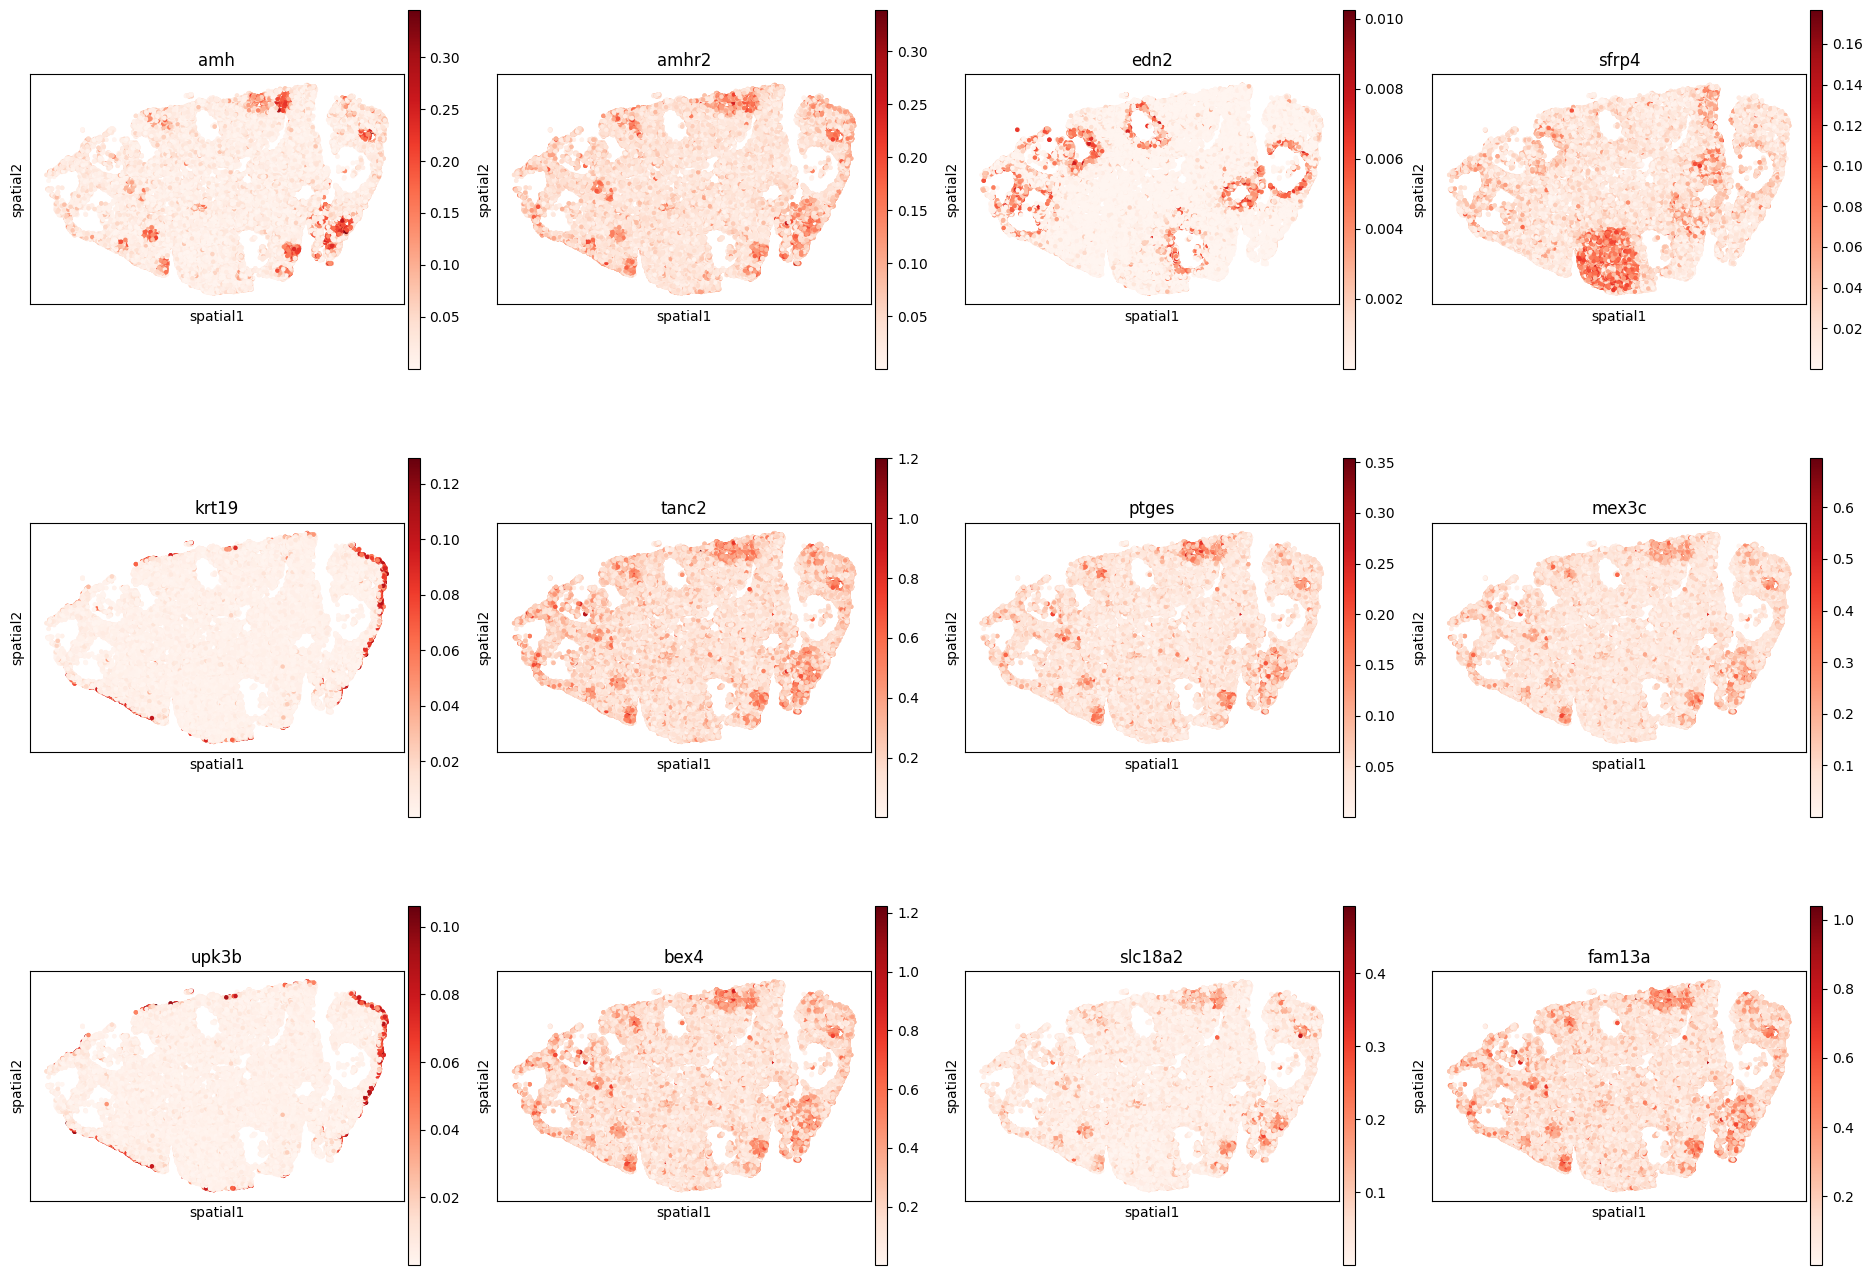

In [23]:
sq.pl.spatial_scatter(
    ad_ge,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

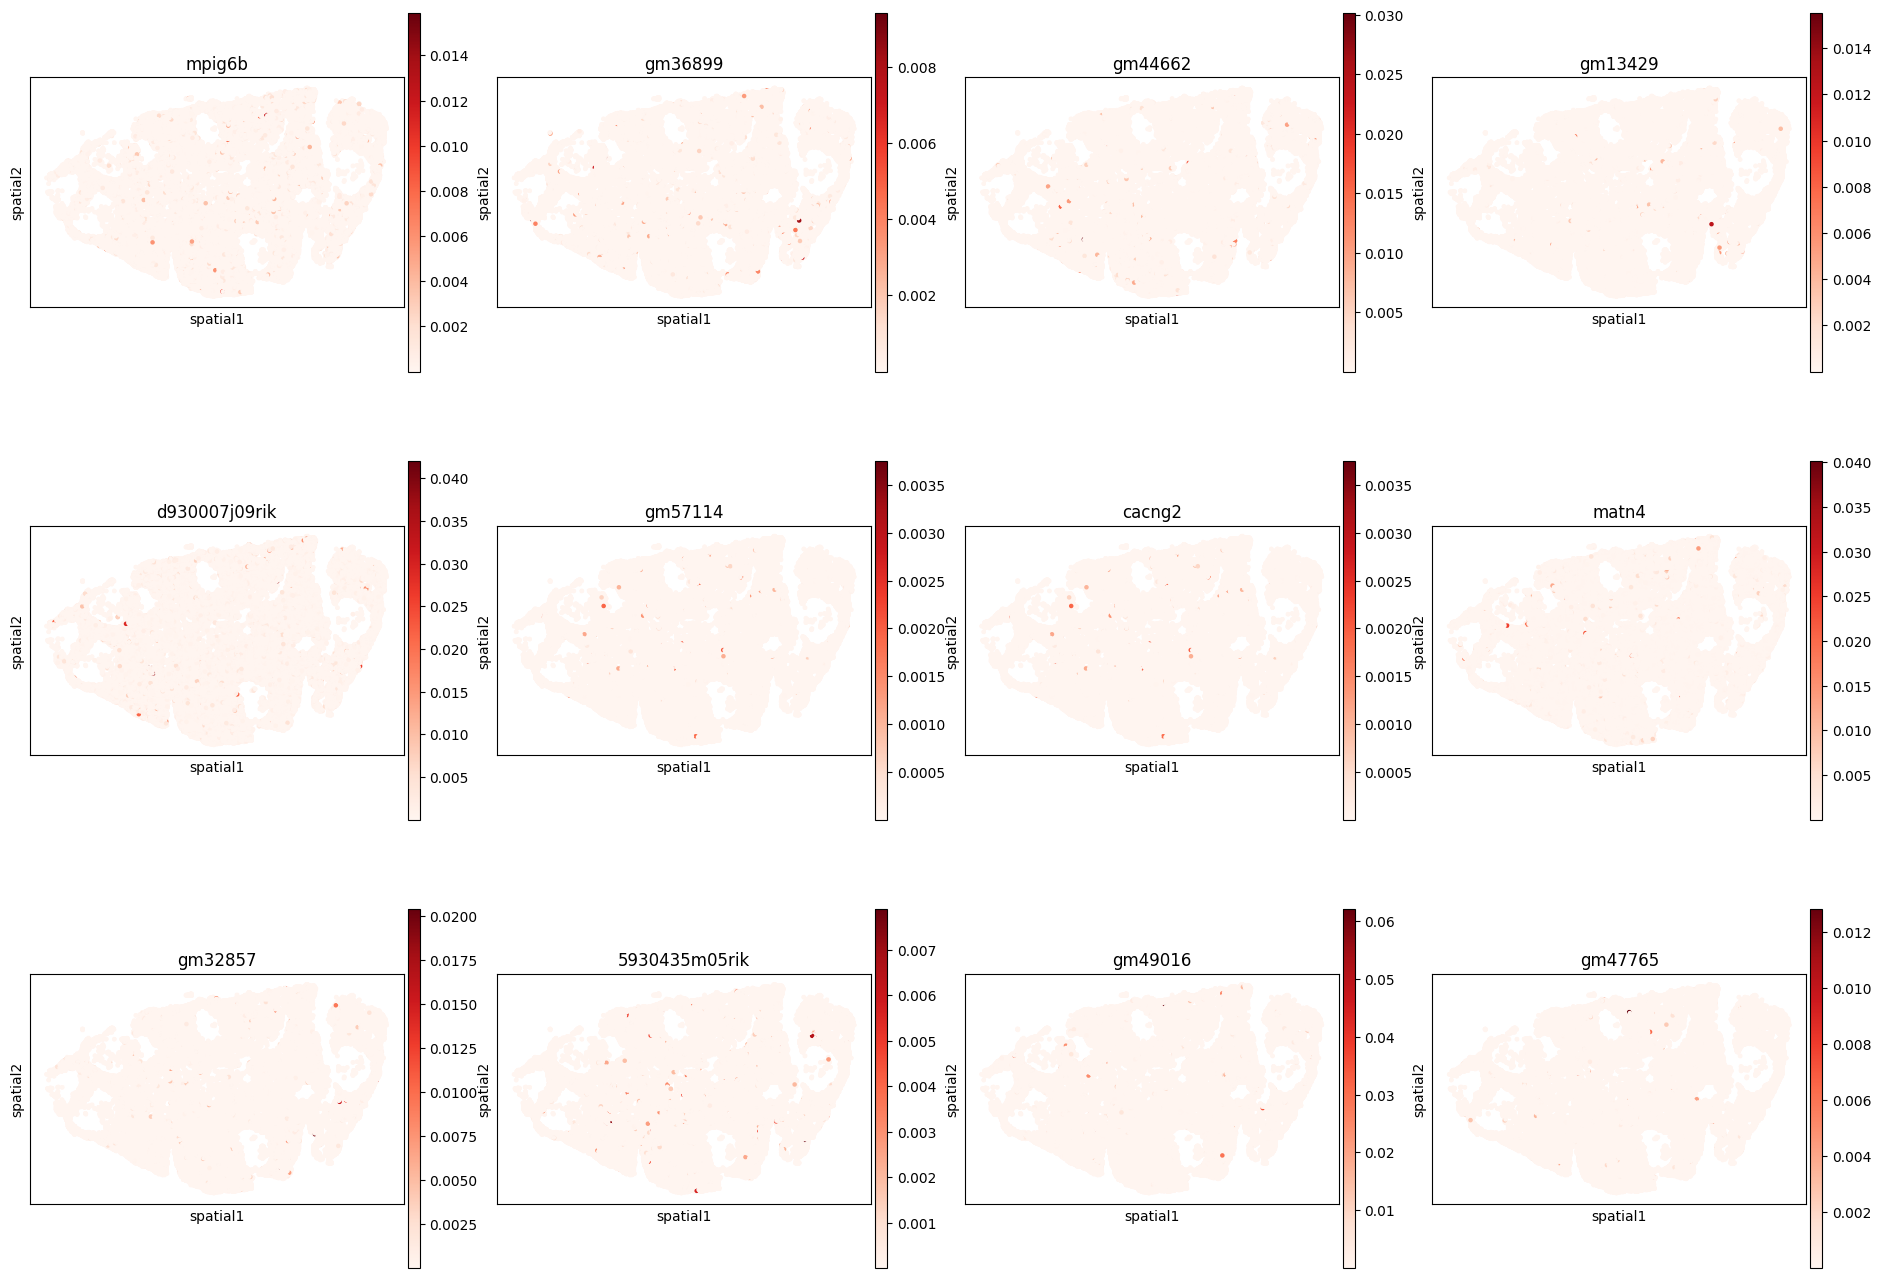

In [32]:
# sq.pl.spatial_scatter(
#     ad_ge,
#     color=bot_autocorr,
#     size=20,
#     cmap='Reds',
#     img=False,
#     figsize=(5,5),
#     shape = None,
#     library_id='spatial',
# )

In [ ]:
ad_ge.uns['moranI']['I'].sort_values(ascending=False).head(25)#.index.tolist()

In [33]:
moran_df = ad_ge.uns['moranI']
moran_sorted = moran_df.sort_values('I', ascending=False)
top25 = moran_sorted.head(2500)
# top25.to_csv("moranI_top2500_genes.csv", index=True)

In [33]:
adata = sc.read_h5ad('/workspace/region_1/processed_region1.h5ad') #spatial data

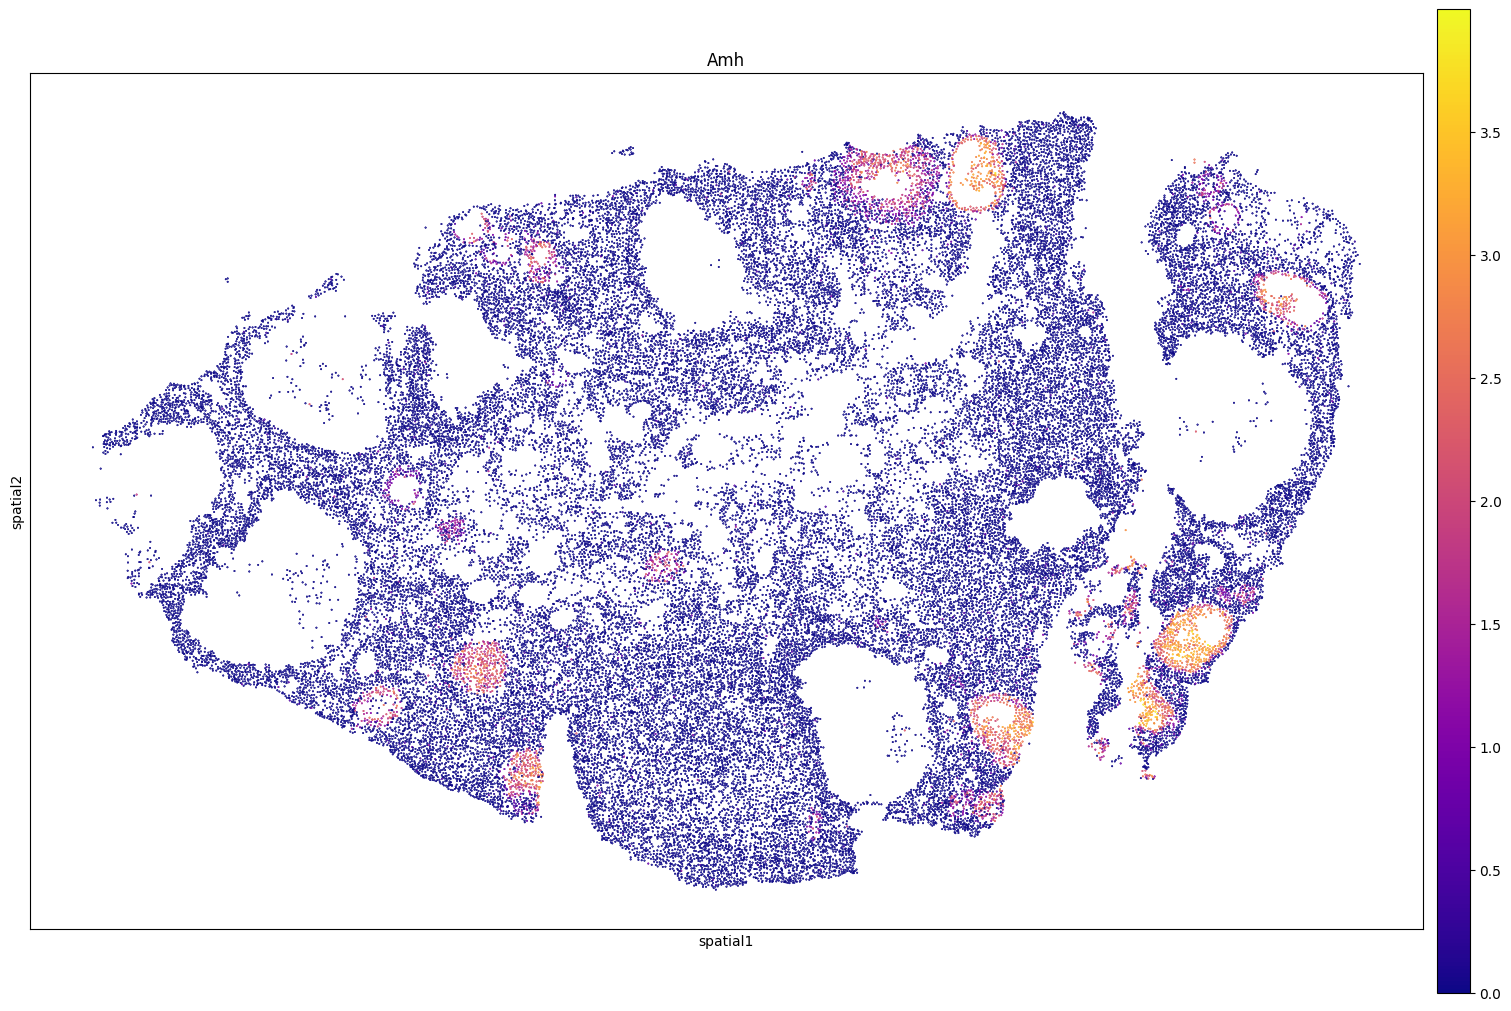

In [37]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Amh",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [ ]:
sq.pl.spatial_scatter(
    ad_ge,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

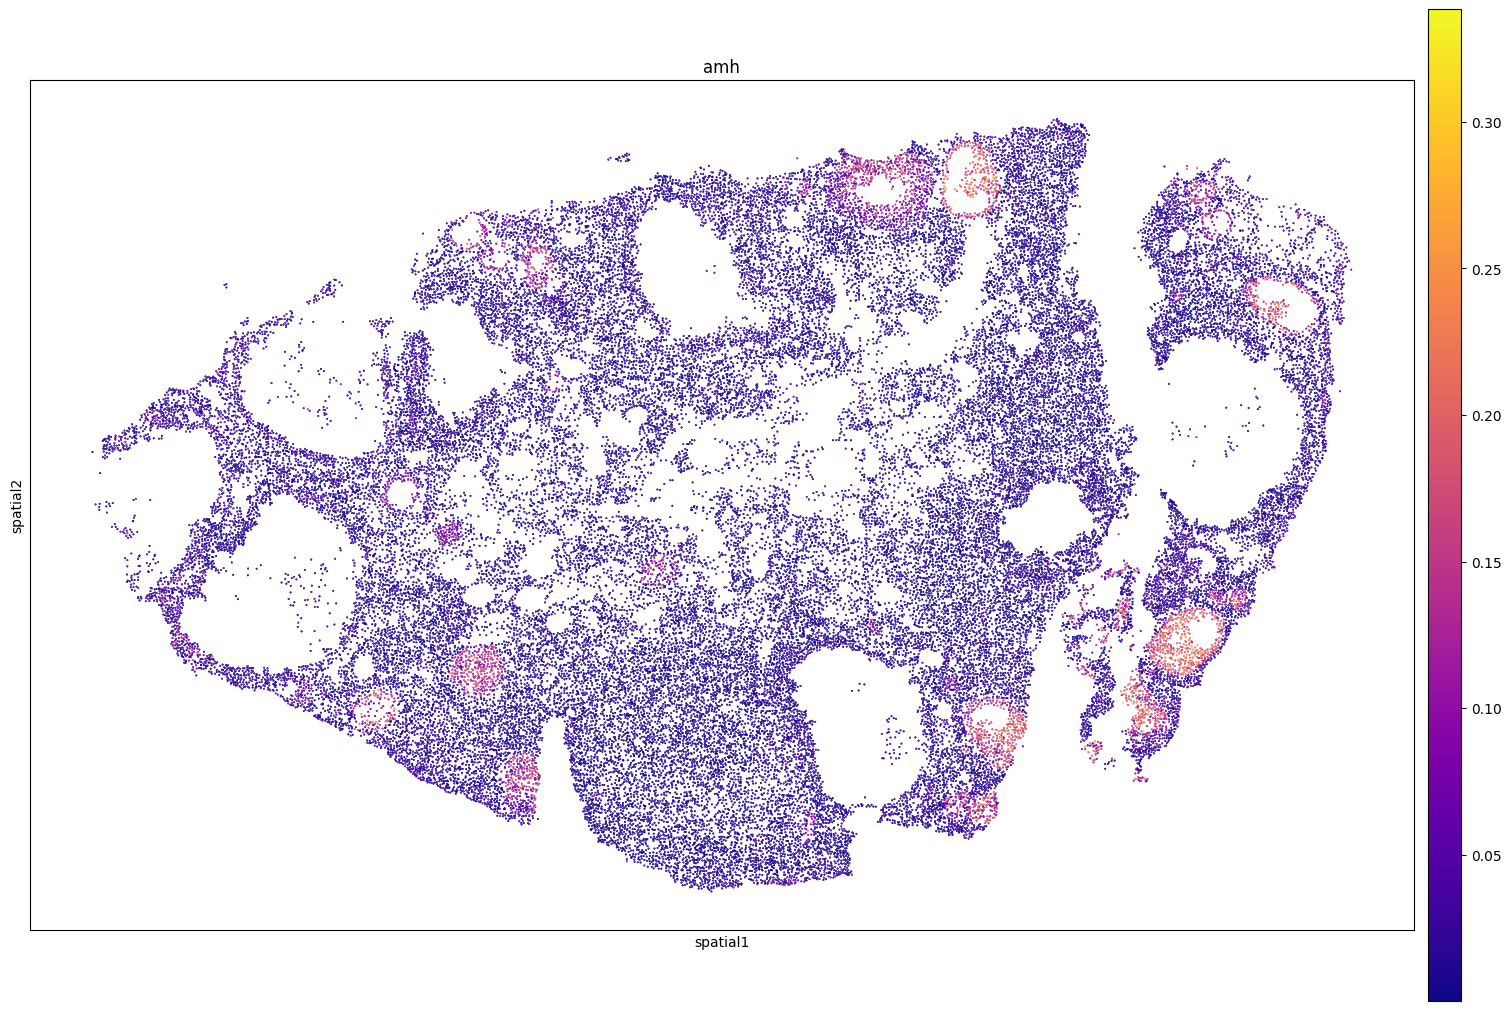

In [36]:
sq.pl.spatial_scatter(
    ad_ge,
    shape=None,
    color="amh",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [56]:
# sq.pl.spatial_scatter(
#     adata,
#     shape=None,
#     color="igf1",
#     size=0.5,
#     library_id='spatial',
#     figsize=(15, 10),
#     cmap = 'plasma',
# )

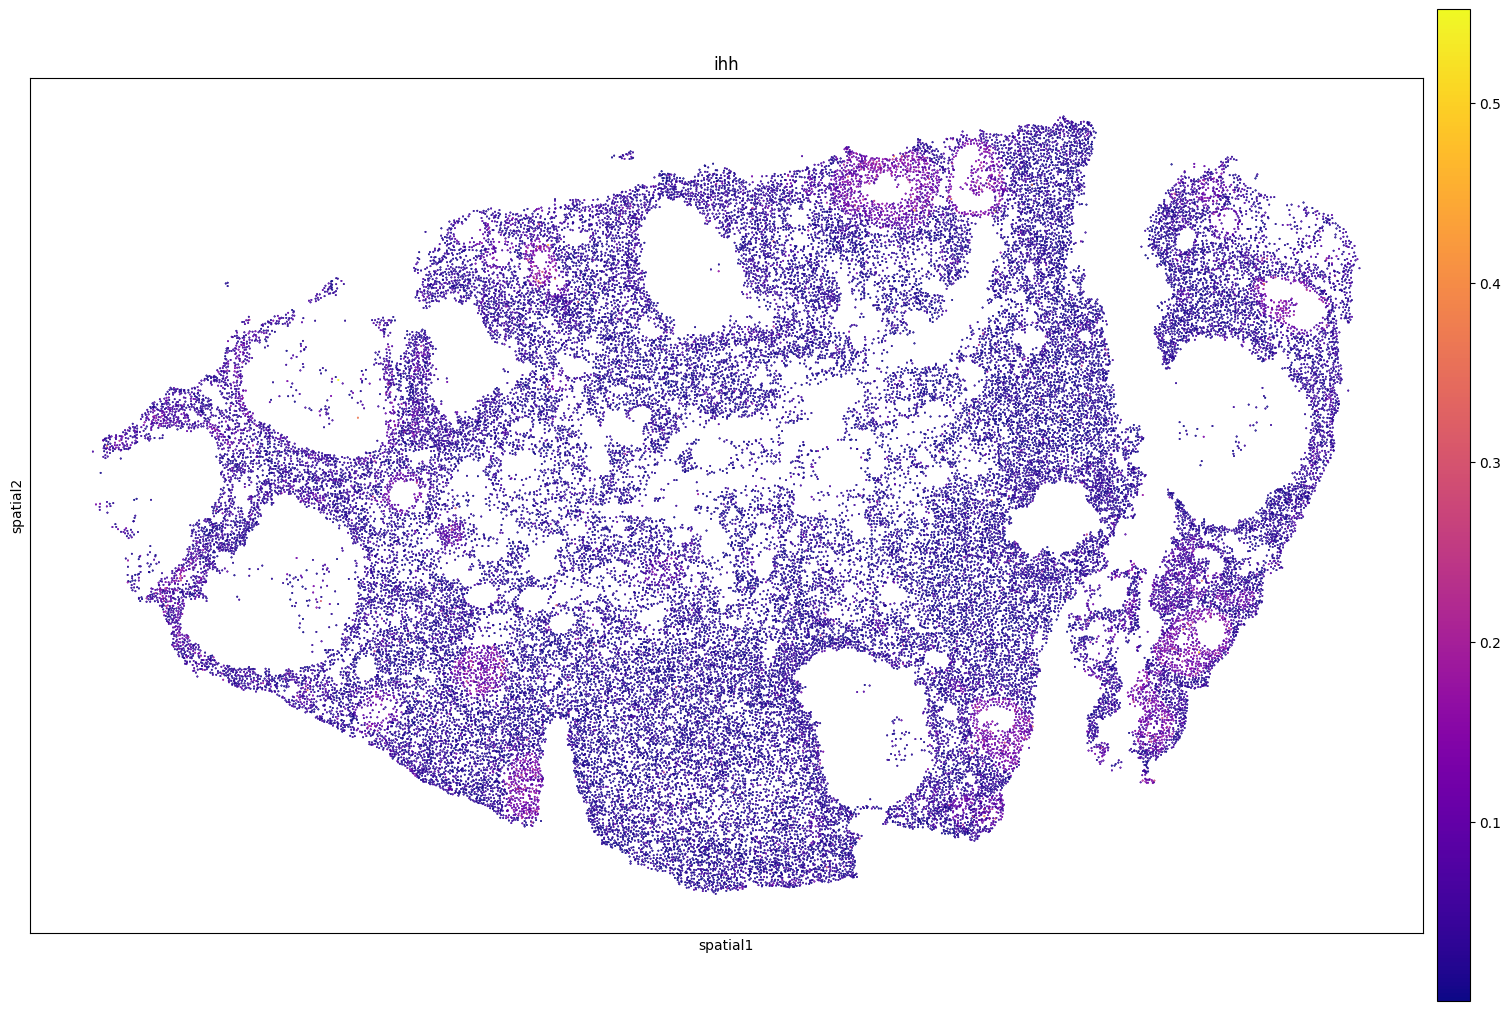

In [41]:
sq.pl.spatial_scatter(
    ad_ge,
    shape=None,
    color="ihh",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [ ]:
sq.pl.spatial_scatter(
    ad_ge,
    shape=None,
    color="Spp1",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [ ]:
sq.pl.spatial_scatter(
    ad_ge,
    shape=None,
    color="Edn2",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

✅ 在 ad_ge.var_names 里的基因有 45 个：
['bmp2', 'bmp4', 'bmp6', 'bmp7', 'gdf11', 'amh', 'wnt10a', 'wnt10b', 'wnt2', 'wnt4', 'wnt6', 'wnt9a', 'wnt5a', 'tgfa', 'areg', 'btc', 'hbegf', 'ereg', 'fgf1', 'fgf2', 'fgf18', 'fgf9', 'fgf16', 'fgf21', 'igf1', 'dhh', 'ihh', 'cxcl12', 'ctf1', 'lif', 'osm', 'tnf', 'tnfsf12', 'spp1', 'retn', 'nampt', 'angptl2', 'angptl4', 'angpt2', 'mdk', 'edn1', 'edn2', 'nppc', 'gas6', 'pros1']

✅ 在 ad_ge.obs.columns 里的基因有 0 个：
[]

✅ 最终可绘图基因（共 45 个）:
['mdk', 'edn1', 'bmp4', 'tnfsf12', 'angptl4', 'fgf16', 'areg', 'osm', 'pros1', 'fgf18', 'angpt2', 'ctf1', 'edn2', 'tgfa', 'cxcl12', 'igf1', 'nppc', 'nampt', 'dhh', 'fgf21', 'bmp7', 'tnf', 'wnt10b', 'wnt2', 'ihh', 'hbegf', 'gdf11', 'wnt4', 'retn', 'fgf1', 'wnt10a', 'bmp6', 'ereg', 'fgf2', 'wnt9a', 'lif', 'angptl2', 'fgf9', 'wnt6', 'wnt5a', 'btc', 'gas6', 'amh', 'bmp2', 'spp1']


In [38]:
import squidpy as sq
import math
ligands = [
    "Bmp2", "Bmp4", "Bmp6", "Bmp7", "Gdf11", "Amh", "Inhibin B", "Wnt10a",
    "Wnt10b", "Wnt2", "Wnt4", "Wnt6", "Wnt9a", "Wnt5a", "Tgfa", "Areg",
    "Btc", "Hbegf", "Ereg", "Fgf1", "Fgf2", "Fgf18", "Fgf9", "Fgf16",
    "Fgf21", "Igf1", "Dhh", "Ihh", "Cxcl12", "Ctf1", "Lif", "Osm",
    "Tnf", "Tnfsf12", "Spp1", "Retn", "Nampt", "Angptl2", "Angptl4", "Angpt2",
    "Mdk", "Edn1", "Edn2", "Nppc", "Gas6", "Pros1"
] #Cellchat results from huang data
ligands = [g.lower() for g in ligands]
genes_in_var = [g for g in ligands if g in ad_ge.var_names]
genes_in_obs = [g for g in ligands if g in ad_ge.obs.columns]

print(f"✅ 在 ad_ge.var_names 里的基因有 {len(genes_in_var)} 个：")
print(genes_in_var)
print()
print(f"✅ 在 ad_ge.obs.columns 里的基因有 {len(genes_in_obs)} 个：")
print(genes_in_obs)

# 3️⃣ 合并可能的来源（如果只关心表达矩阵，优先用 var_names）
genes_available = list(set(genes_in_var + genes_in_obs))
print(f"\n✅ 最终可绘图基因（共 {len(genes_available)} 个）:")
print(genes_available)


import math
import squidpy as sq
import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.titlesize': 28,      # 标题字体更大
    'axes.titleweight': 'bold',# 标题加粗
    'axes.labelsize': 16,      # 坐标轴字体
    'xtick.labelsize': 14,     # x轴刻度
    'ytick.labelsize': 14,     # y轴刻度
    'legend.fontsize': 16,     # 图例字体
    'figure.titlesize': 20,    # 整体figure标题
})
genes = genes_available
num_per_page = 6
num_pages = math.ceil(len(genes) / num_per_page)
for i in range(num_pages):
    start = i * num_per_page
    end = min((i + 1) * num_per_page, len(genes))
    genes_batch = genes[start:end]
    
    print(f"\n🧬 Plotting genes {start+1}-{end}: {genes_batch}")
    sq.pl.spatial_scatter(
        adata = ad_ge,
        color = genes_batch,
        ncols = 2,
        shape = None,
        size = 3.0,         # 点更大，视觉更饱满（原来是 1.0）
        alpha = 0.9,
        cmap = "plasma",
        figsize = (18, 14)
    )
    plt.tight_layout()
    plt.savefig(f"page_{i+1}.png", dpi=400, bbox_inches='tight')
    plt.close()  # 关闭当前 figure，防止下一页叠在一起



✅ 在 ad_ge.var_names 里的基因有 45 个：
['bmp2', 'bmp4', 'bmp6', 'bmp7', 'gdf11', 'amh', 'wnt10a', 'wnt10b', 'wnt2', 'wnt4', 'wnt6', 'wnt9a', 'wnt5a', 'tgfa', 'areg', 'btc', 'hbegf', 'ereg', 'fgf1', 'fgf2', 'fgf18', 'fgf9', 'fgf16', 'fgf21', 'igf1', 'dhh', 'ihh', 'cxcl12', 'ctf1', 'lif', 'osm', 'tnf', 'tnfsf12', 'spp1', 'retn', 'nampt', 'angptl2', 'angptl4', 'angpt2', 'mdk', 'edn1', 'edn2', 'nppc', 'gas6', 'pros1']

✅ 在 ad_ge.obs.columns 里的基因有 0 个：
[]

✅ 最终可绘图基因（共 45 个）:
['mdk', 'edn1', 'bmp4', 'tnfsf12', 'angptl4', 'fgf16', 'areg', 'osm', 'pros1', 'fgf18', 'angpt2', 'ctf1', 'edn2', 'tgfa', 'cxcl12', 'igf1', 'nppc', 'nampt', 'dhh', 'fgf21', 'bmp7', 'tnf', 'wnt10b', 'wnt2', 'ihh', 'hbegf', 'gdf11', 'wnt4', 'retn', 'fgf1', 'wnt10a', 'bmp6', 'ereg', 'fgf2', 'wnt9a', 'lif', 'angptl2', 'fgf9', 'wnt6', 'wnt5a', 'btc', 'gas6', 'amh', 'bmp2', 'spp1']

🧬 Plotting genes 1-6: ['mdk', 'edn1', 'bmp4', 'tnfsf12', 'angptl4', 'fgf16']

🧬 Plotting genes 7-12: ['areg', 'osm', 'pros1', 'fgf18', 'angpt2', 'ctf1']

In [ ]:
ligands_yui = ["Bmp2","Bmp4","Bmp6","Bmp7","Amh","Wnt10b","Wnt4","Wnt6","Wnt5a","Tgfa","Hbegf","Fgf2","Fgf18","Fgf9","Igf1","Dhh","Ihh","Ctf1","Tnfsf12" ,"Spp1", "Nampt","Angptl4","Mdk" , "Nppc", "Gas6","Pros1"]

In [45]:
print(ad_sp.uns.keys())

dict_keys(['Cell_Type_centrality_scores', 'Cell_Type_colors', 'Cell_Type_nhood_enrichment', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 't-test', 'umap', 'training_genes', 'overlap_genes', 'dominant_ct_colors'])


In [46]:
print(ad_sp.uns["spatial"].keys())

dict_keys(['library'])


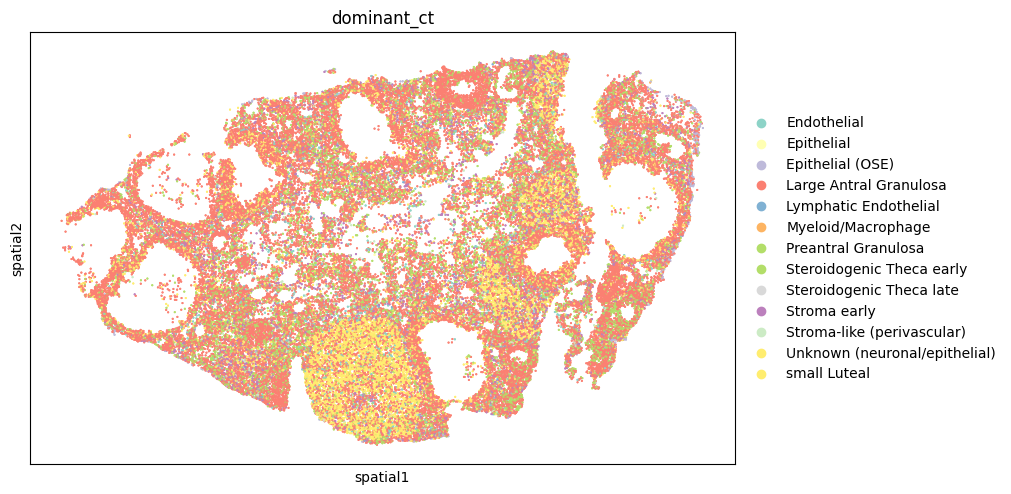

In [49]:
import numpy as np
import squidpy as sq
import pandas as pd

# 创建一个包含细胞类型预测结果的 DataFrame
ct_pred = pd.DataFrame(
    ad_sp.obsm["tangram_ct_pred"],
    index=ad_sp.obs_names,
    columns=ad_sc.obs["cell_type"].unique()  # ✅ 从单细胞数据提取 cell type 名
)


# 将每个 cell type 的预测值加入 obs，方便绘图
for ct in ct_pred.columns:
    ad_sp.obs[ct] = ct_pred[ct]

# 取每个 spot 预测值最大的 cell type
ad_sp.obs["dominant_ct"] = ct_pred.idxmax(axis=1)

# 看一下分布
ad_sp.obs["dominant_ct"].value_counts()

# 画出主导细胞类型的空间分布
sq.pl.spatial_scatter(
    adata = ad_sp,
    color = "dominant_ct",
    shape = None,          
    library_id = "library",
    size = 1.0,
    figsize = (10, 8),
    palette = "Set3"
)


In [ ]:
ad_ge

In [44]:
adata_sc = ad_sc

In [ ]:
adata_st = sc.read_h5ad('/workspace/region_1/processed_region1.h5ad')

In [ ]:
# tg.project_cell_annotations(ad_map, adata_st, annotation="cell_type")
# annotation_list = list(pd.unique(adata_sc.obs['cell_type']))
# tg.plot_cell_annotation_sc(adata_st, annotation_list,perc=0.02)

In [54]:
# cType = 'large luteal'
# inds_c = np.where(ad_sc.obs['ff_names'] == cType)
# plt.scatter(ad_sp.obsm['spatial'][:,0],ad_sp.obsm['spatial'][:,1],np.sum(ad_map[:,inds_c],axis=1))

In [ ]:
genes = ['Inha']
tg.plot_genes_sc(genes, adata_measured=ad_sc, perc=0.02)

In [ ]:
tg.plot_training_scores(ad_map, bins=20, alpha=.5)

In [ ]:
ad_map.uns['train_genes_df']